# Regresion  

En este tema vamos a entrar en el aprendizaje supervisado, el aprendizaje supervisado lo podemos dividir en dos tipos de problemas, de regresión y de clasificación. 

A lo largo de este tema vamos a centrarnos en los problemas de regresión, concretamente vamos a enfocarnos en un tipo de regresión: Regresión Lineal. 

Existen distintos métodos para hacer regresiones, muchos de ellos regresiones que no son lineales, pero para vamos a enfocarnos en la regresión lineal para adquirir bien los fundamentos de la regresión. 



## Modelado predictivo

Empezamos dando un paso atras, para los problemas de aprendizaje supervisado tendremos una matriz de nxp features que llamaremos X y un n-vector con las _"etiquetas"_ que llamaremos _y_. En todos los problemas de aprendizaje __supervisado__ la intención es construir un modelo f que mapee las filas de la matriz X a cada etiqueta de y: 

$$f(X_{j \cdot}) \approx y_j\,.$$

Todos los problemas de aprendizaje supervisado pueden ser representados de este modo, siendo los siguientes los parámetros variables: 

1. El __modelo__ f. Este modelo solo representa modelos lineales. Normalmente asumiremos que una de la columnas de X será la constante 1, de este modo

 $$ f(X_{j \cdot}) = X_{ji} \cdot \beta_i$$

representa el modelo lineal, incluido el intercepto.


## Linear Regression

Recordamos la grafica basica de los errores de una regresión lineal

![$L^1$ versus $L^2$ regularization](img/linear_regression_error.gif)

La regresión lineal es posiblemente el modelo mas sencillo:

$$f(X_{j \cdot}) = \sum_i \beta_i X_{ji}$$

El modelo de error asume que las y son independientes y normalmente distribuidas al rededdor de $X_{ji} \cdot \beta_i$ con una desviacion estándar $\sigma$.  

### Likelihood and cost functions

Suponemos que sabemos que el modelo correcto fue dado por algun beta. Dada la asunción de arriba sobre el modelo de error, la probabilidad de medir y es:

$$ P(y_j \mid \beta_i) = \prod_j \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[-\left( \frac{X_{ji} \cdot \beta_i - y_j}{2 \sigma} \right)^2 \right] \,.$$

Sin embargo, no conocemos ese beta. Tenemos que encontrarlos, dada la y, tenemos que encontrar betas que maximicen la probabilidad de beta condicionada a y: $P(\beta_i \mid y_j)$. Por lo que con la regla de bayes sabemos: 

$$ P(\beta_i \mid y_j) = P(y_j \mid \beta_i) \frac{P(\beta_i)}{P(y_j)} \,.$$


Sabemos también el primer termino de RHS, y $P(y_j)$ que es independiente de $\beta_i$. De este modo, solamente $P(\beta_i)$ es desconocido. En modelos de regresión lineal, suponemos que no tenemos un conocimiento de antemano o _prior_ como en bayes. De este modo, el modelo mas probable es determinado maximizando la función de likelihood: 

$$ L(\beta) = \prod_j \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[-\left( \frac{X_{ji} \cdot \beta_i - y_j}{2 \sigma} \right)^2 \right] \propto P(\beta_i \mid y_j) \,.$$

**Ejercicios:** 

1. ¿Que es el intercepto?
1. ¿Que pasa si $p \gg n$?  ¿Como abordariamos este problema?
1. ¿Que pasa si $X$ tiene dos columnas co-lineares? ¿Por que puede pasar esto?
1. ¿Cual es el efecto de los outliers? ¿Como lo arreglarías?

### Regresión lineal en practica

In [19]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144
sns.set_theme()

In [20]:
from sklearn import datasets, linear_model, utils, preprocessing
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns


mnist = pd.read_pickle("data/mnist.pkl")
original_columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSAT"]

np.random.seed(42)
Xraw, y = utils.shuffle(mnist.data, mnist.target)
Xraw = pd.DataFrame(Xraw, columns=original_columns)
y = pd.Series(y)

In [21]:
Xraw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSAT
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [22]:
y.head()

0    23
1    32
2    13
3    22
4    16
dtype: int64

Text(0, 0.5, 'Home Price')

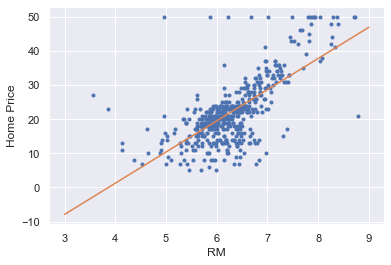

In [24]:
X1 = Xraw[['RM']]
linreg = linear_model.LinearRegression(fit_intercept=True)  # This is the default
linreg.fit(X1, y)
plt.plot(X1, y, '.')
x = np.linspace(3, 9).reshape(-1,1)
plt.plot(x, linreg.predict(x), '-')
plt.xlabel('RM')
plt.ylabel('Home Price')

In [25]:
df = Xraw.copy()
df['home price'] = y

In [26]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSAT,home price
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66,19
502,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,21
503,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24
504,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,13


In [27]:
cols = ['CRIM', 'ZN', 'NOX', 'AGE', 'RAD', 'LSAT', 'home price']

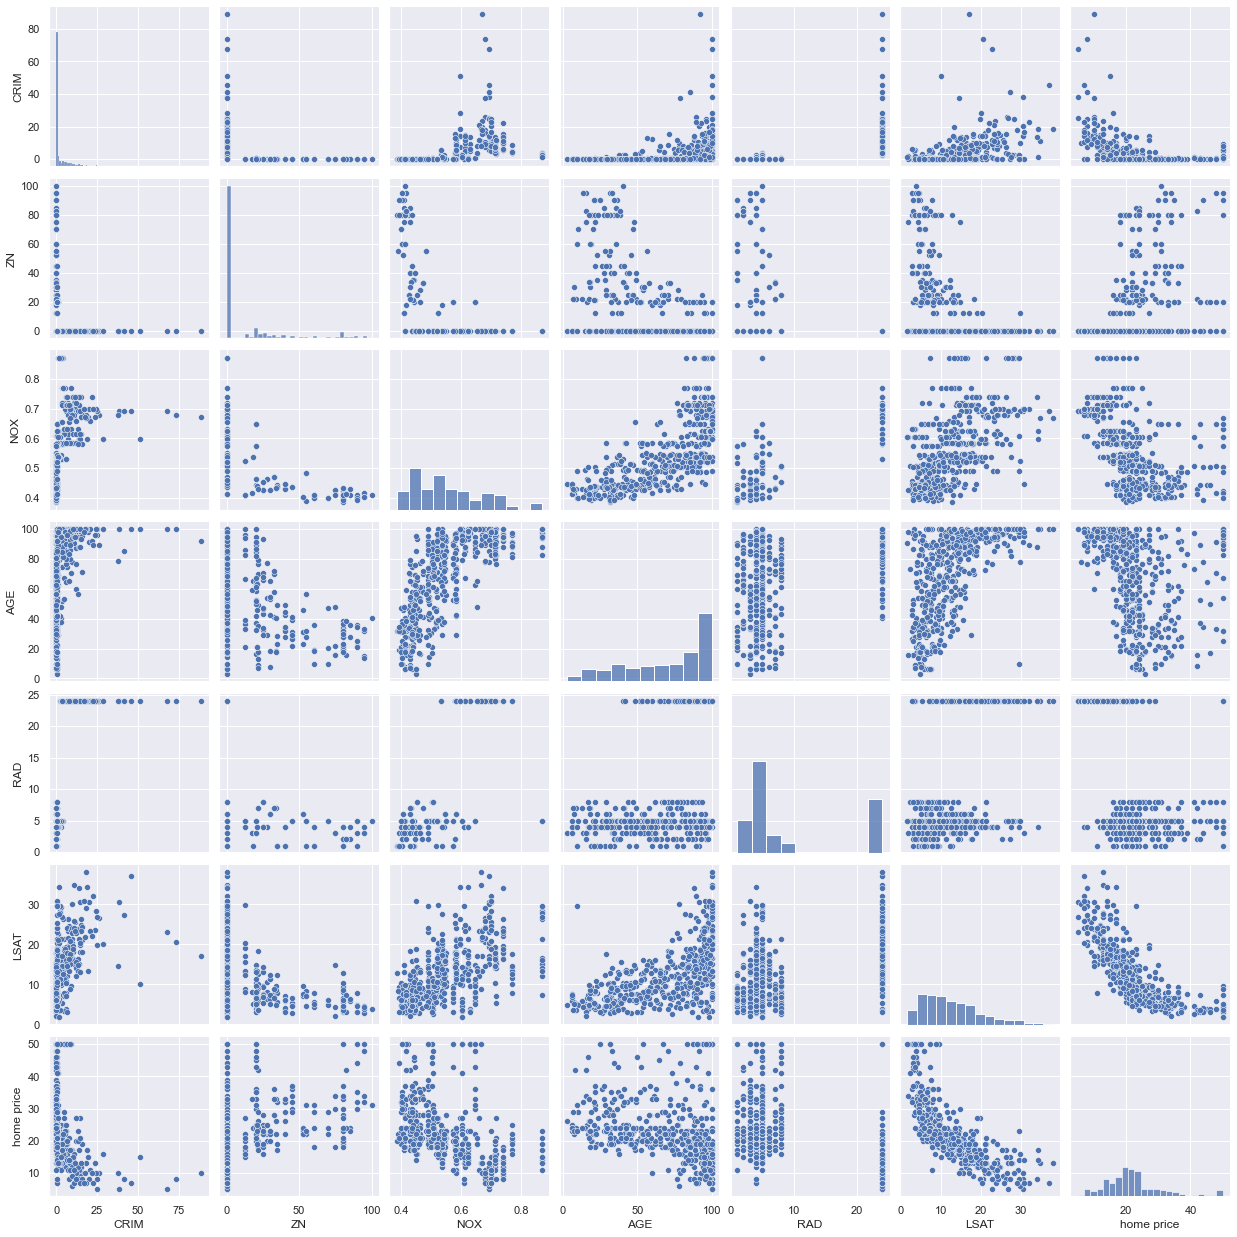

In [28]:
sns.pairplot(df[cols])

In [29]:
X = Xraw.copy()
X["INV_CRIM"] = 1./X.CRIM
X["INDUS7"] = X.INDUS <= 7.
X["INDUS16"] = 1. * (X.INDUS <= 16.)
X["INV_NOX"] = 1./X.NOX
X["AGE75"] = 1. * (X.AGE <= 76.)
X["RAD15"] = 1. * (X.RAD <= 15.)
X["TAX500"] = 1. * (X.TAX <= 500.)
X["PTRATIO19"] = X.PTRATIO <= 19.
X["B350"] = 1. * (X.B <= 350.)
X["INV_LSAT"] = 1. / X.LSAT
X=X.astype(float) 
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,INV_CRIM,INDUS7,INDUS16,INV_NOX,AGE75,RAD15,TAX500,PTRATIO19,B350,INV_LSAT
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,...,10.895620,1.0,1.0,1.960784,0.0,1.0,1.0,1.0,0.0,0.110619
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,...,17.717931,1.0,1.0,2.237136,1.0,1.0,1.0,1.0,0.0,0.283286
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,...,9.457159,0.0,0.0,1.642036,0.0,1.0,0.0,0.0,0.0,0.055340
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,...,10.912265,0.0,1.0,2.421308,1.0,1.0,1.0,0.0,0.0,0.181159
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,...,0.196457,0.0,0.0,1.402525,0.0,0.0,0.0,0.0,0.0,0.057904


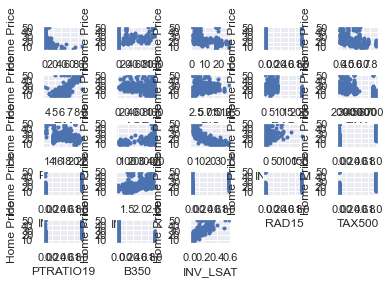

In [11]:
plt.subplots_adjust(wspace=0.8, hspace=1)
for i, col in enumerate(X):
    plt.subplot(5, 5, i+1)
    plt.plot(X[col], y, '.')
    plt.locator_params(nbins=6)
    plt.xlabel(col)
    plt.ylabel('Home Price')

Comparamos el performance del modelo con diferentes sets de features

<AxesSubplot:xlabel='Model'>

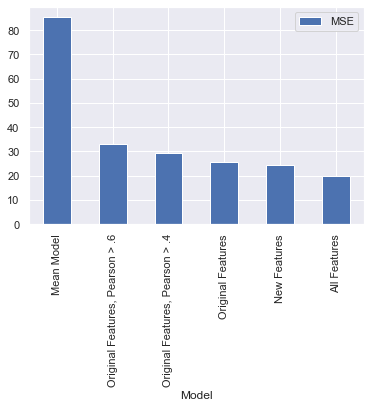

In [12]:
from sklearn import model_selection
from scipy import stats

cv = model_selection.ShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
def compute_error(est, X, y):
    return -model_selection.cross_val_score(est, X, y, cv=cv, scoring='neg_mean_squared_error').mean()

def abs_corr(x, y):
    return np.abs(stats.pearsonr(x, y)[0])

new_columns = ['INV_CRIM', 'ZN', 'INDUS7', 'INDUS16', 'CHAS', 'INV_NOX', 
               'RM', 'AGE75', 'DIS', 'RAD15', 'TAX500', 'PTRATIO19', 'B350', 'INV_LSAT']

model_performance = pd.DataFrame([
    ("Mean Model", y.var()),
    ("Original Features, Pearson > .6",
       compute_error(linreg, X[[col for col in original_columns if abs_corr(X[col], y) > .6]], y)),
    ("Original Features, Pearson > .4",
       compute_error(linreg, X[[col for col in original_columns if abs_corr(X[col], y) > .4]], y)),
    ("Original Features", compute_error(linreg, X[original_columns], y)),
    ("New Features", compute_error(linreg, X[new_columns], y)),
    ("All Features", compute_error(linreg, X, y)),
], columns=["Model", "MSE"])
model_performance.set_index("Model")
model_performance.plot.bar(x="Model", y="MSE")

In [13]:
[col for col in original_columns if abs_corr(X[col], y) > .6]

['RM', 'LSAT']

## Regularization

En el problema anterior hemos utilizado un criterio _ad-hoc_ para seleccionar features. Sin embargo, una aproximación mas realista sería seleccionar una distribucion para $P(\beta_i)$ que tenga su pico sobre $\beta_i = 0$, en lugar de uniforme. 

$$ P (\beta_i) \propto \prod_i \exp \left[ -\frac{\alpha}{2} \left(\frac{\beta_i}{\sigma} \right)^2\right] \,,$$

entonces

$$ L(\beta) \propto \prod_j \exp\left[ -\frac{1}{2}\left( \frac{X_{ji} \cdot \beta_i - y_j}{\sigma} \right)^2 \right]\prod_i \exp \left[ -\frac{\alpha}{2} \left(\frac{\beta_i}{\sigma} \right)^2\right] \,.$$

Así la log-likelihood negativa es (para transformación lineal)tion)

$$- \log(L(\beta)) \sim \| y - X \beta \|^2 + \alpha \| \beta \|^2\,.$$

Después de completar el cuadrado, resulta que la solución tiene una forma cerrada, 

$$ \hat \beta = (X^T X + \alpha I)^{-1} X^T y\,. $$

Para tener una idea de que está pasando, usamos SVD

$$ X = U \Sigma V^T $$

Vemos que 

$$ \hat \beta = V D U^T y $$

donde

$$ D_{ii} = \frac{\Sigma_{ii} }{\Sigma_{ii}^2 + \alpha}\,. $$

Cuando $\alpha = 0$, $D_{ii} = \frac{1}{\Sigma_{ii}}$ y decrece hasta 0 cuando alpha tiende a infinito.  Cuanto mas pequeño es $\Sigma_{ii}$, mas rapido decrece hasta 0.


Hemos visto una técnica de regularización que se llama Ridge o L2. 

<AxesSubplot:title={'center':'MSE'}, xlabel='alpha'>

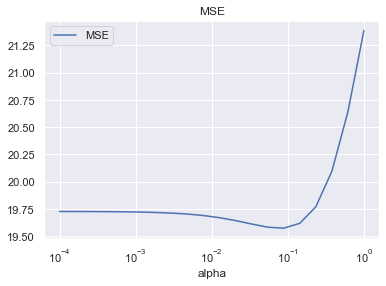

In [14]:
import numpy as np
np.random.seed(42)

alphas = np.logspace(-4., 0, 20)
ridge_models = pd.DataFrame(
    [(alpha,
      "Ridge Regression with alpha = %f" % alpha, 
      compute_error(linear_model.Ridge(alpha=alpha), X, y)) for alpha in alphas],
    columns=['alpha', 'Model', 'MSE'])
ridge_models.plot(x='alpha', y='MSE', logx=True, title='MSE')

Text(0, 0.5, 'Coefficients')

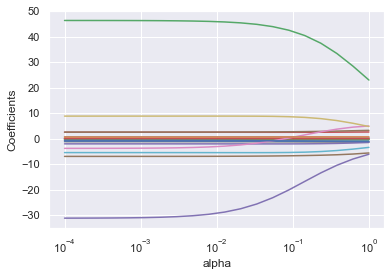

In [15]:
coefs = np.array([linear_model.Ridge(alpha=alpha).fit(X, y).coef_
                  for alpha in alphas])
plt.semilogx(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('Coefficients')

## Regularización Lasso

La regularión Lasso es como Ridge, pero tiene la habilidad de seleccionar features de manera automatica. La función objetivo a minimizar es: 

$$ \frac{1}{2 n} \| y - X^T \beta \|^2 + \alpha \|\beta\|_1 $$

Donde $\|\beta\|_1 = \sum_i |\beta_i| $ es la norma $L^1$ de $\beta$ y $n$ es el numero de ejemplos.

Esta técnica es llamada regularización Lasso o L1 debido a que es como Ridge pero con un _penalty_ L1 en lugar de L2. 

Lasso tiene una propiedad de feature selection donde muchos pesos de features pueden ser cero (y por tanto esas features serían no seleccionadas)



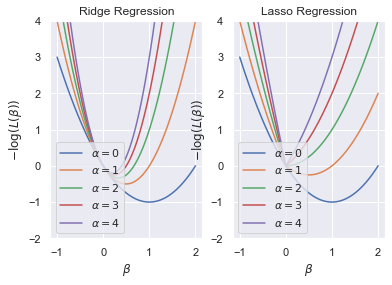

In [16]:
beta = np.linspace(-1,2,100)
base_error = (beta - 1)**2 - 1

for pow in [2,1]:
    plt.subplot(123 - pow)
    for a in range(0, 5):
        plt.plot(beta, base_error + a * abs(beta)**pow, label=r'$\alpha = %i$' % a)
    plt.ylim(-2, 4)
    plt.xlabel(r'$\beta$')
    plt.ylabel(r'$-\log(L(\beta))$')
    plt.legend(loc=3)
    plt.title({2: 'Ridge Regression', 1: 'Lasso Regression'}[pow])

<AxesSubplot:title={'center':'MSE'}, xlabel='alpha'>

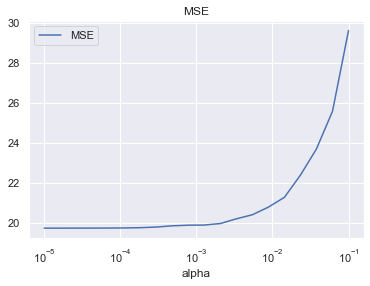

In [17]:
np.random.seed(42)
alphas = np.logspace(-5., -1., 20)


lasso_models = pd.DataFrame(
    [(alpha,
      "Lasso with alpha = %f" % alpha,
      compute_error(linear_model.LassoLars(alpha=alpha), X, y)) for alpha in alphas],
    columns=['alpha', 'Model', 'MSE'])
lasso_models.plot(x='alpha', y='MSE', logx=True, title='MSE')

Text(0, 0.5, 'Coefficients')

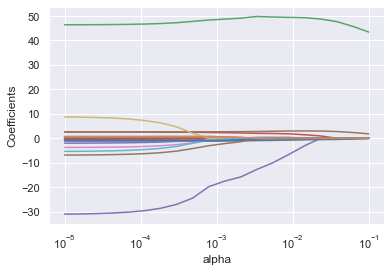

In [18]:
coefs = np.array([linear_model.LassoLars(alpha=alpha).fit(X, y).coef_
                  for alpha in alphas])
plt.semilogx(alphas, coefs)
plt.xlabel('alpha')
plt.ylabel('Coefficients')

### Elastic Net

La combinación de los dos tipos de regularizaciones (L1 y L2) se llama ElasticNet
